In [1]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
nlp = spacy.load("en_core_web_sm")

In [2]:
def creat_deptree(sentence):
    doc = nlp(sentence)
    edges = []
    for token in doc:
        l = []
        a = token.text
        b = token.head.text
        l.append(b)
        l.append(a)
        edges.append(l)
    graph = build_graph(edges)
    return graph, doc

In [3]:
def build_graph(edges):
    graph = defaultdict(list)
    for edge in edges:
        a, b = edge[0], edge[1]
        graph[a].append(b)
        graph[b].append(a)
    return graph


In [4]:
def BFS_SP(graph, start, goal):
    explored = []
    queue = [[start]]

    if start == goal:
        print("Same Node")
        return

    while queue:
        path = queue.pop(0)
        node = path[-1]
        if node not in explored:
            neighbours = graph[node]
            for neighbour in neighbours:
                new_path = list(path)
                new_path.append(neighbour)
                queue.append(new_path)
                if neighbour == goal:
                    return new_path
            explored.append(node)
    print("So sorry, but a connecting path doesn't exist :(")
    return

In [5]:
def extract_entities(doc):
    entities = {}
    for ent in doc.ents:
        entities[ent.text] = ent.label_

In [6]:
def plot_graph_with_path(graph, path):
    G = nx.Graph()
    for node, neighbours in graph.items():
        for neighbour in neighbours:
            G.add_edge(node, neighbour)
    pos = nx.spring_layout(G)  # positions for all nodes
    nx.draw(G, pos, with_labels=True, font_weight='bold')
    # Highlight the path
    path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)
    plt.show()

Entities: None
Graph: defaultdict(<class 'list'>, {'journeyed': ['Exploring', ',', 'he', 'journeyed', 'journeyed', 'with', '.'], 'Exploring': ['journeyed', 'cultures'], 'cultures': ['diverse', 'Exploring'], 'diverse': ['cultures'], ',': ['journeyed'], 'he': ['journeyed'], 'with': ['journeyed', 'mindedness'], 'mindedness': ['open', '-', 'with', 'and', 'curiosity'], 'open': ['mindedness'], '-': ['mindedness'], 'and': ['mindedness'], 'curiosity': ['mindedness'], '.': ['journeyed']})
Relation: ['journeyed', 'with', 'mindedness', 'curiosity']


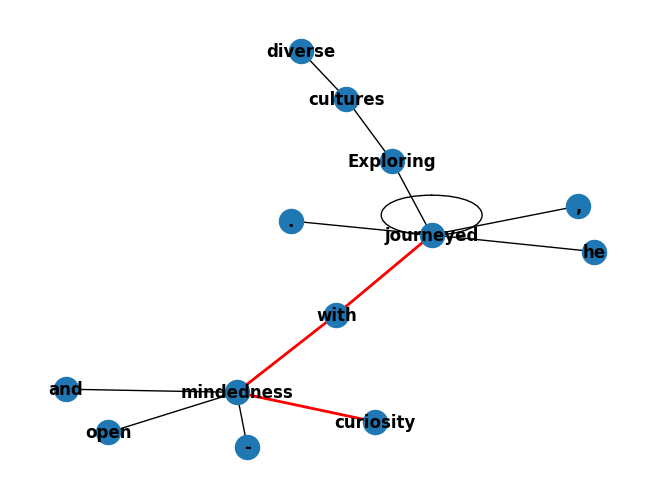

In [9]:
def main():
    sentence = "Exploring diverse cultures, he journeyed with open-mindedness and curiosity."
    graph, doc = creat_deptree(sentence)
    entities = extract_entities(doc)
    print("Entities:", entities)
    print("Graph:", graph)
    relation = BFS_SP(graph, 'journeyed', 'curiosity')
    print("Relation:", relation)
    if relation != "So sorry, but a connecting path doesn't exist :(":
        plot_graph_with_path(graph, relation)

if __name__ == "__main__":
    main()